In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading File
df = pd.read_csv("/content/drive/MyDrive/DataSets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.shape

(150, 6)

## Data Cleaning

In [ ]:
# Dropping Unnecessary columns
df.drop(["Id"], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.duplicated().sum()

np.int64(3)

In [ ]:
df.drop_duplicates(inplace=True)

## Data Visualization

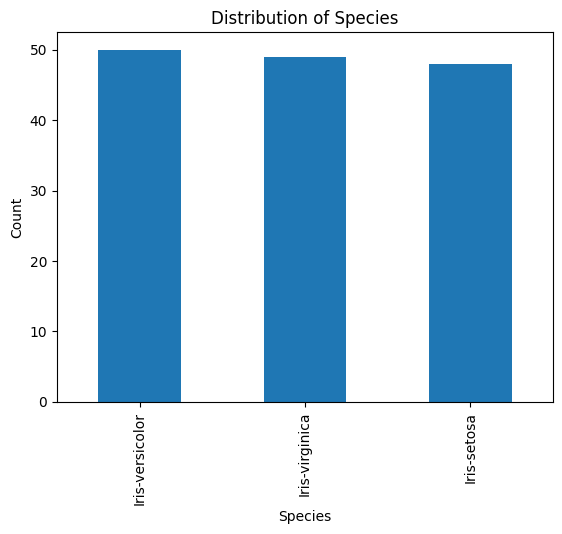

In [ ]:
# Distribution of target column
df.Species.value_counts().plot(kind='bar')
plt.title("Distribution of Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

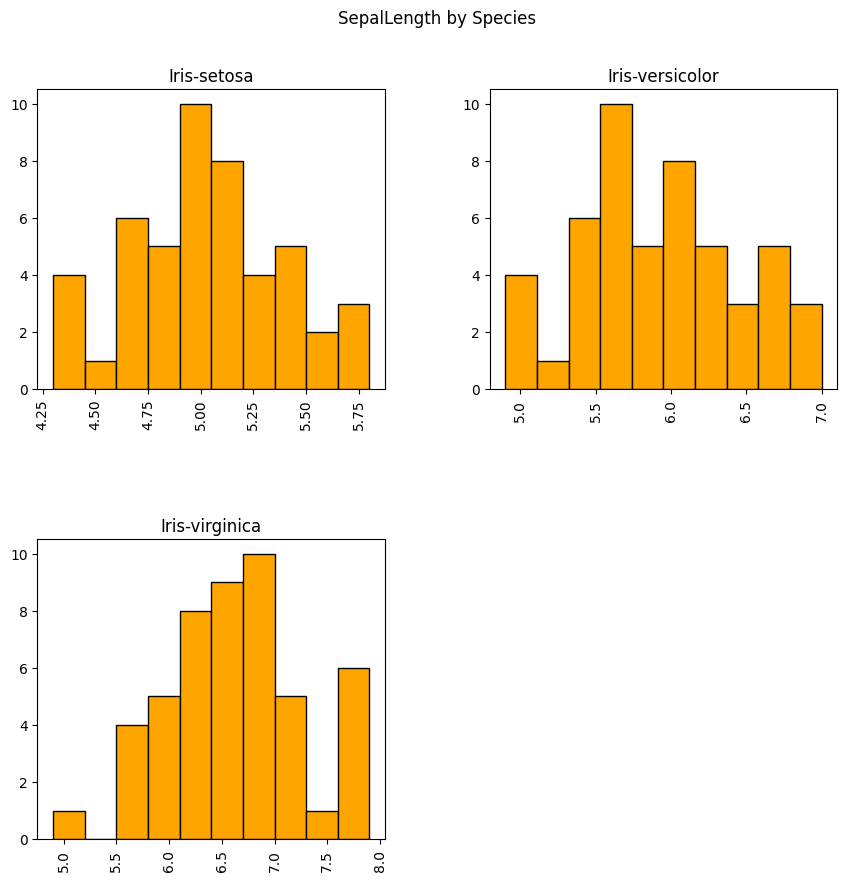

In [ ]:
# Distribution of Sepal Length Across Iris Species
df.hist(column = "SepalLengthCm", by = "Species", figsize = (10,10), color = "orange", edgecolor = "black")
plt.suptitle("SepalLength by Species")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

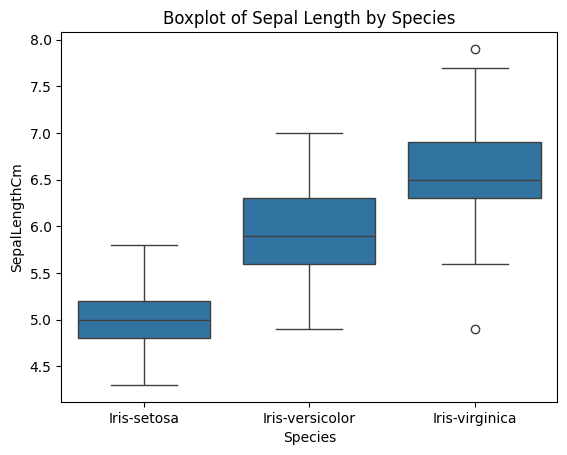

In [ ]:
# Creating Boxplot of Sepal Length by Species
sns.boxplot( x = "Species", y = "SepalLengthCm", data=df)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

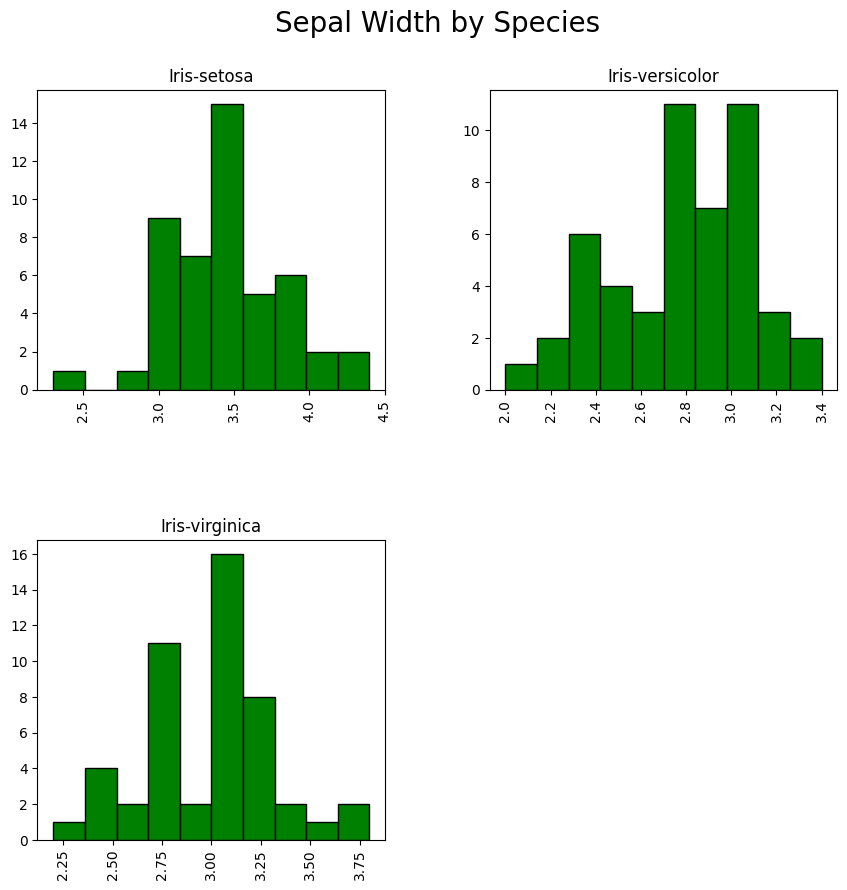

In [ ]:
# Distribution of Sepal Width Across Iris Species
df.hist(column='SepalWidthCm', by='Species', figsize=(10, 10), color='green',edgecolor='black')
plt.suptitle('Sepal Width by Species', fontsize=20)
plt.xlabel('Width', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

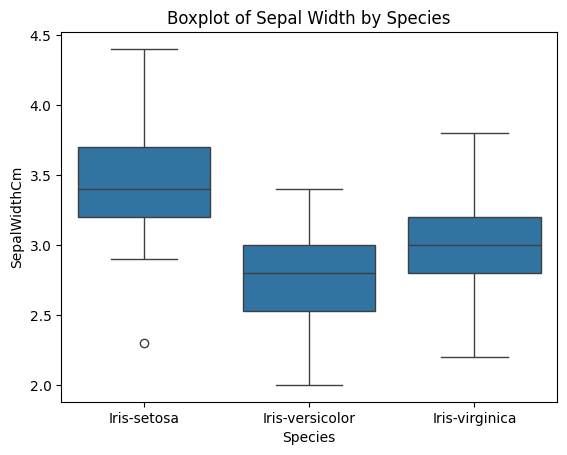

In [ ]:
# Creating Boxplot of Sepal Width by Species
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.title("Boxplot of Sepal Width by Species")
plt.show()

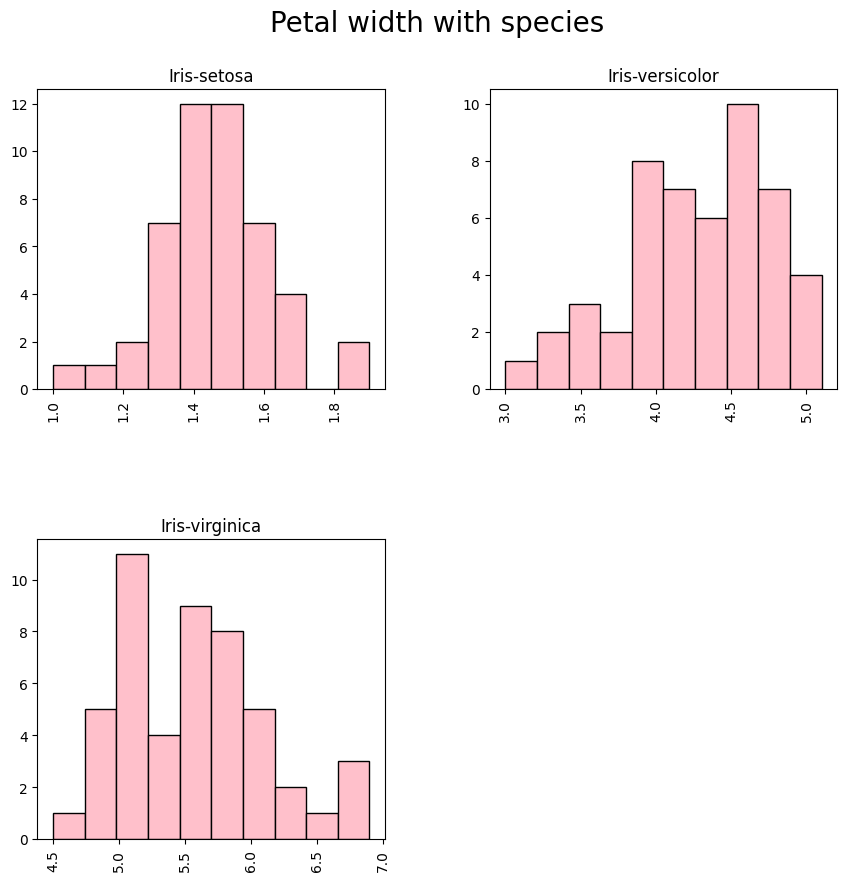

In [ ]:
# Distribution of Petal Length Across Iris Species
df.hist(column='PetalLengthCm', by='Species', figsize=(10,10),color='pink',edgecolor='black')
plt.suptitle('Petal width with species', fontsize=20)
plt.xlabel('Length',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

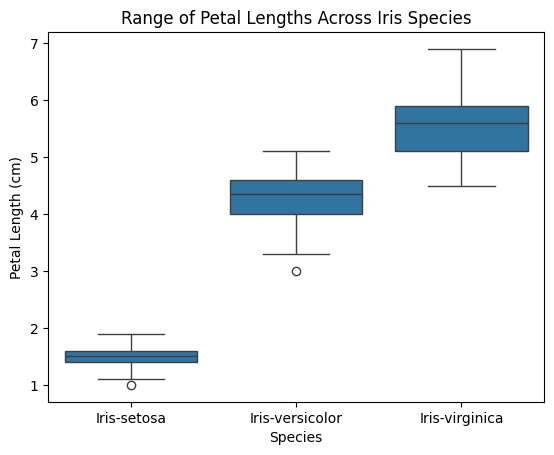

In [ ]:
# Creating Boxplot of Petal Length by Species
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Range of Petal Lengths Across Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

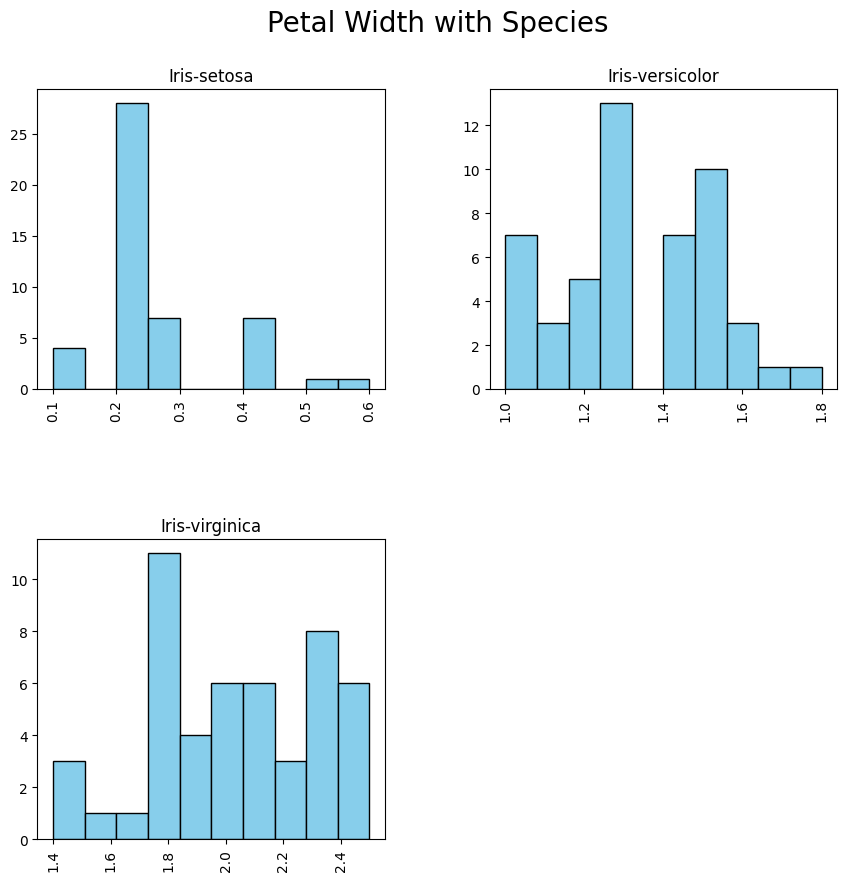

In [ ]:
# Distribution of Petal Width Across Iris Species
df.hist(column='PetalWidthCm',by='Species',figsize=(10,10),color='skyblue',edgecolor='black')
plt.suptitle("Petal Width with Species",fontsize=20)
plt.xlabel('Width',fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

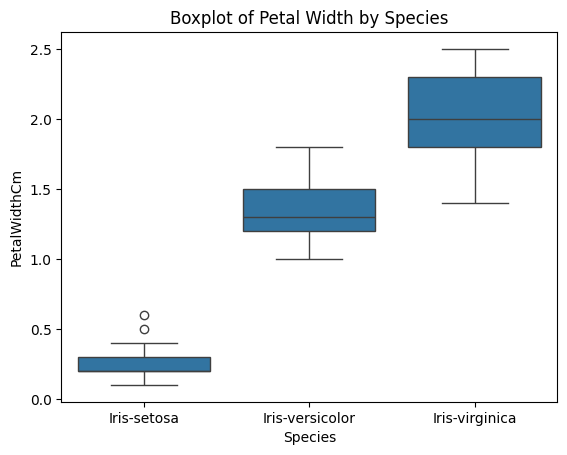

In [ ]:
# Creating Boxplot of Petal Width by Species
sns.boxplot(x="Species", y="PetalWidthCm", data=df)
plt.title("Boxplot of Petal Width by Species")
plt.show()

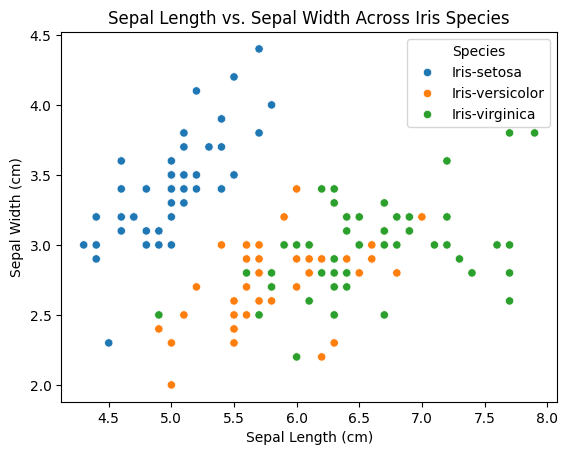

In [ ]:
# Exploring relationship between SepalLength vs SepalWidth
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title('Sepal Length vs. Sepal Width Across Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.show()

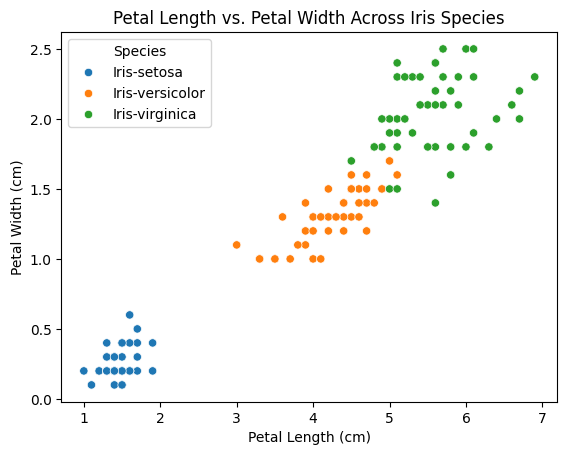

In [ ]:
# Exploring relationship between PetalLength vs PetalWidth
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title('Petal Length vs. Petal Width Across Iris Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

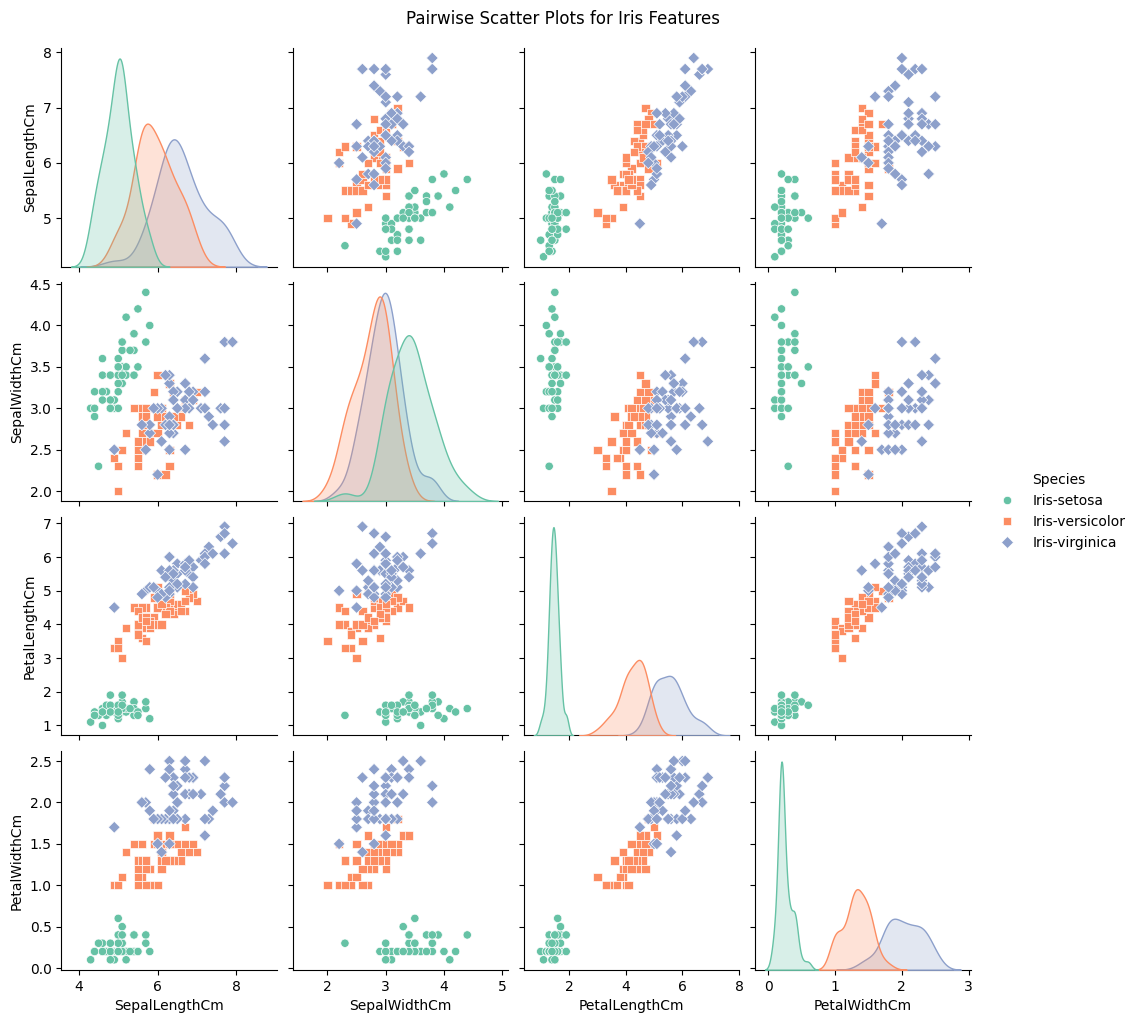

In [ ]:
# Creating pairplot for each pair of features
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette='Set2')
plt.suptitle('Pairwise Scatter Plots for Iris Features', y=1.02)
plt.show()

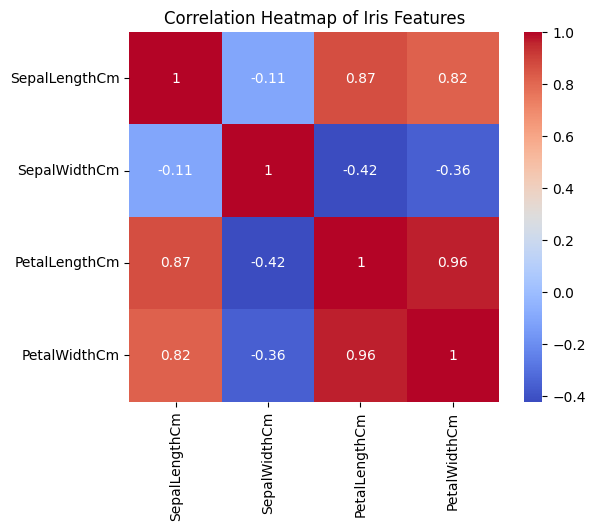

In [ ]:
# Heatmap of iris features
numeric_df = df.drop(['Species'], axis=1)
correlation_matrix =numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Iris Features')
plt.show()

## Data balancing

In [ ]:
x= df.drop("Species", axis=1)
y= df.Species

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_new, y_new = sampler.fit_resample(x,y)

<Axes: xlabel='Species'>

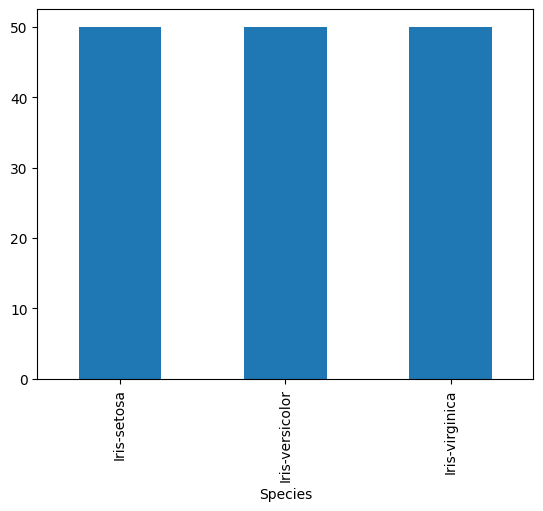

In [ ]:
y_new.value_counts().plot(kind="bar")

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

## Modeling

In [ ]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [ ]:
# Storing functions of models in variable
models = [
 LogisticRegression(),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 MultinomialNB(),
 MLPClassifier()
 ]

In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize

In [ ]:
# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    name = type(model).__name__

    print(name)
    print("Train Score:", train_score)
    print("Test Score:", test_score)
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(conf_matrix)
    print(classification_report(y_test, y_pred))
    print("+" * 50)

    # Plotting the confusion matrix as a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # ROC AUC
    if hasattr(model, "predict_proba"):

        y_prob = model.predict_proba(X_test)
        classes = np.unique(y_test)
        n_classes = len(classes)

        # Binarize labels
        y_test_bin = label_binarize(y_test, classes=classes)

        # Overall ROC AUC
        roc_auc = roc_auc_score(
            y_test,
            y_prob,
            multi_class='ovr',
            average='weighted'
        )

        print("Overall ROC AUC Score (OVR):", roc_auc)

        # Plotting ROC for each class
        plt.figure(figsize=(7, 6))

        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            auc_score = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Multiclass ROC Curve - {name}')
        plt.legend()
        plt.show()

LogisticRegression
Train Score: 0.9666666666666667
Test Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

++++++++++++++++++++++++++++++++++++++++++++++++++


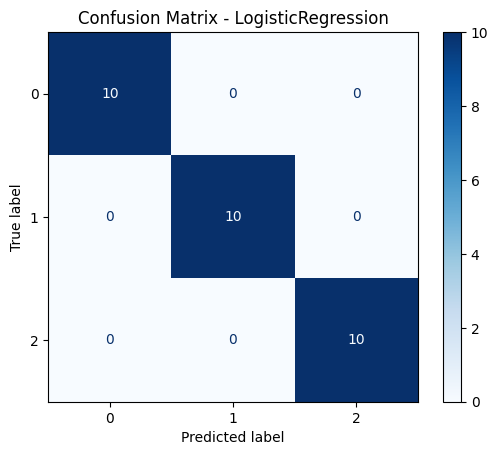

Overall ROC AUC Score (OVR): 1.0


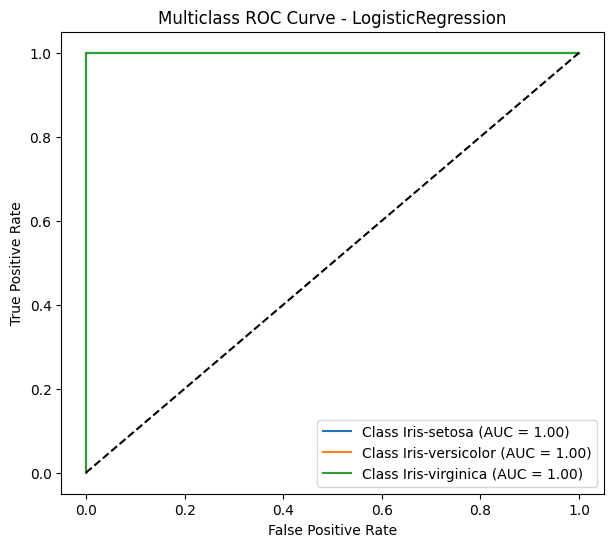

SVC
Train Score: 0.975
Test Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

++++++++++++++++++++++++++++++++++++++++++++++++++


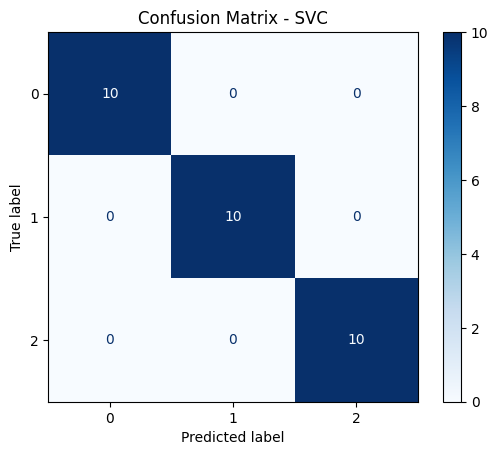

KNeighborsClassifier
Train Score: 0.975
Test Score: 0.9666666666666667
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

++++++++++++++++++++++++++++++++++++++++++++++++++


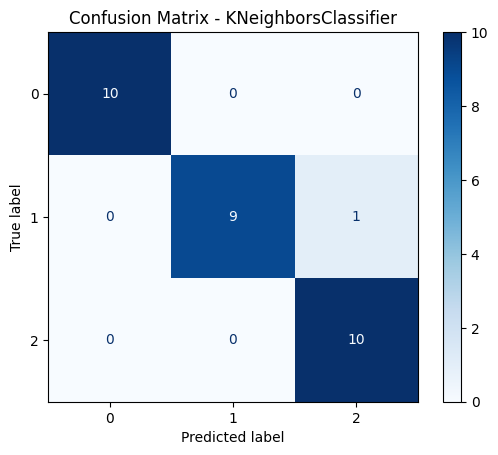

Overall ROC AUC Score (OVR): 0.9949999999999999


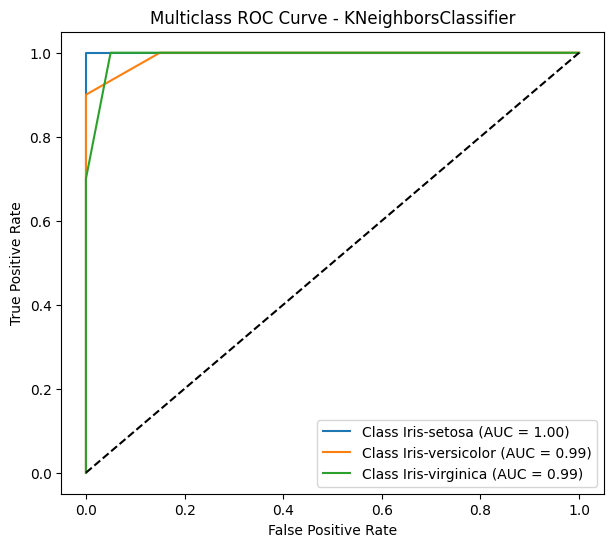

DecisionTreeClassifier
Train Score: 1.0
Test Score: 0.9666666666666667
Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

++++++++++++++++++++++++++++++++++++++++++++++++++


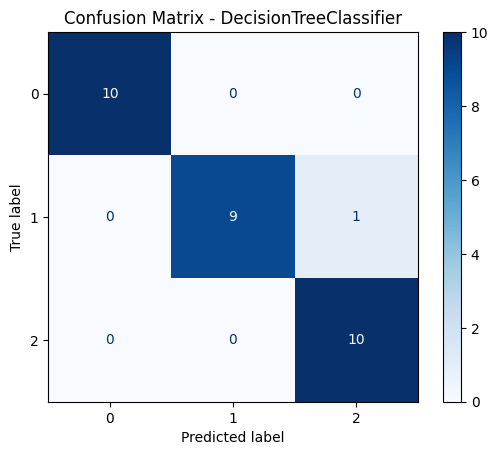

Overall ROC AUC Score (OVR): 0.975


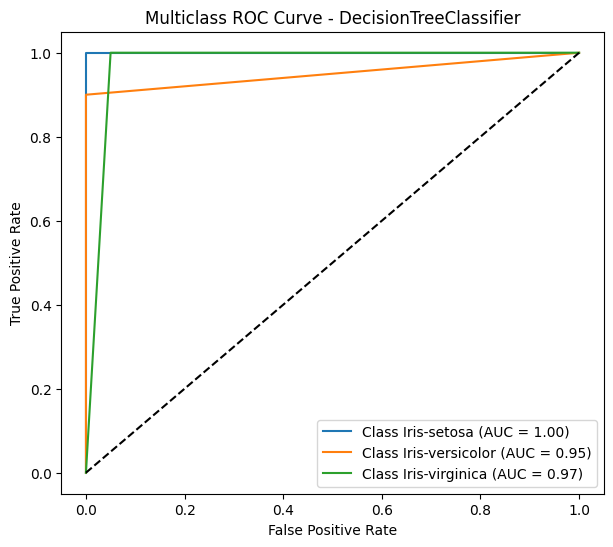

RandomForestClassifier
Train Score: 1.0
Test Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

++++++++++++++++++++++++++++++++++++++++++++++++++


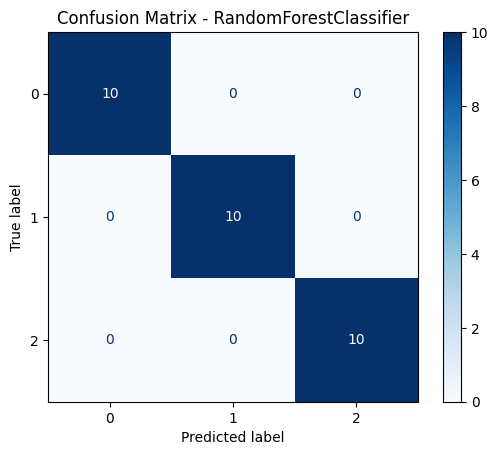

Overall ROC AUC Score (OVR): 1.0


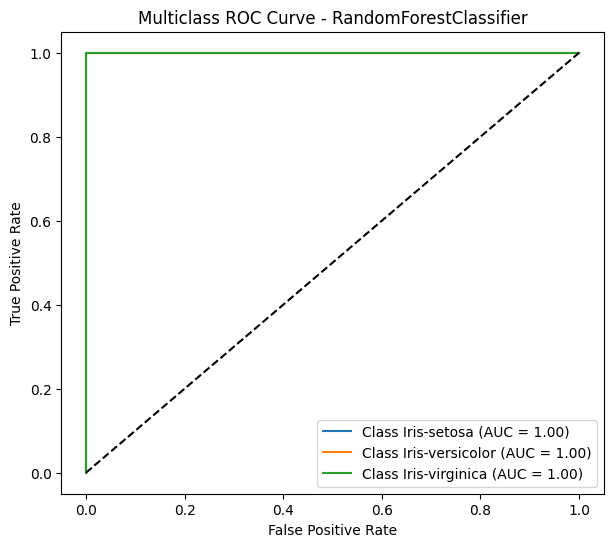

MultinomialNB
Train Score: 0.9583333333333334
Test Score: 0.9333333333333333
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9326599326599326
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

++++++++++++++++++++++++++++++++++++++++++++++++++


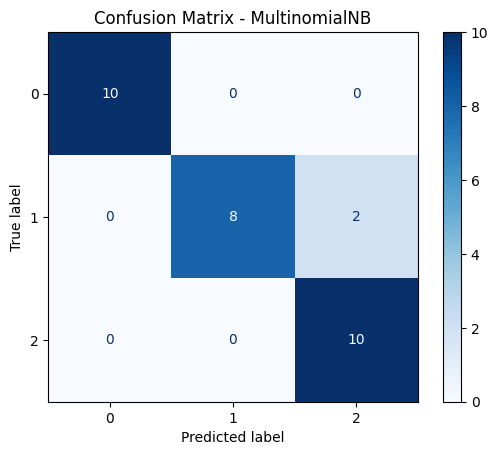

Overall ROC AUC Score (OVR): 0.99


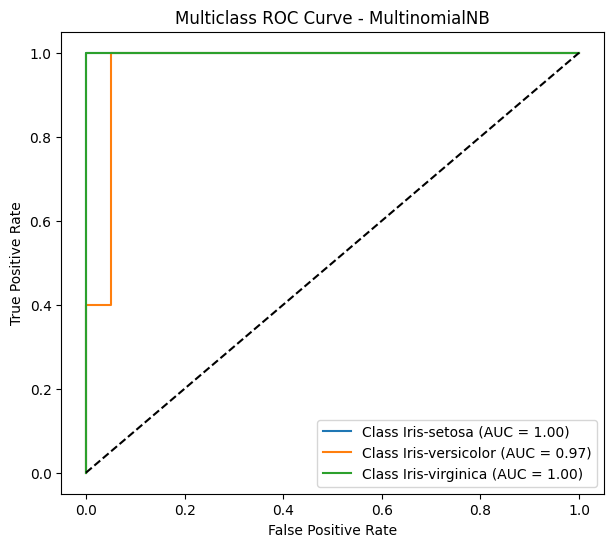

MLPClassifier
Train Score: 0.9833333333333333
Test Score: 0.9333333333333333
Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333333
F1 Score: 0.9326599326599326
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

++++++++++++++++++++++++++++++++++++++++++++++++++


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


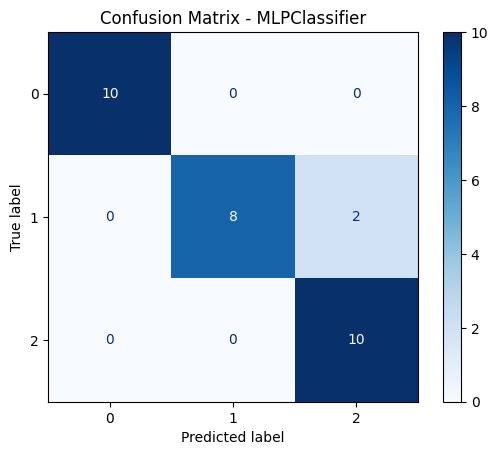

Overall ROC AUC Score (OVR): 1.0


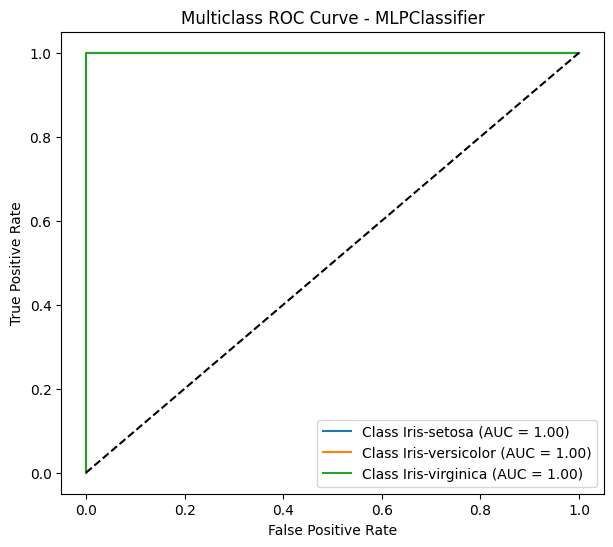

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test)